In [10]:
my_dict = {"a": 5, "b": 10, "c":7}
my_dict = {k: v for k, v in sorted(my_dict.items(), key=lambda item: item[1])}
current = my_dict.popitem()
my_dict



{'a': 5, 'c': 7}

In [16]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians
starting_latlon = [40.85971, -73.90891]
dest_latlon = [40.85745, -73.90965]
start_in_radians = [radians(_) for _ in starting_latlon]
dest_in_radians = [radians(_) for _ in dest_latlon]
(haversine_distances([start_in_radians, dest_in_radians]) * 6371)[0][1]

0.25889186891201926

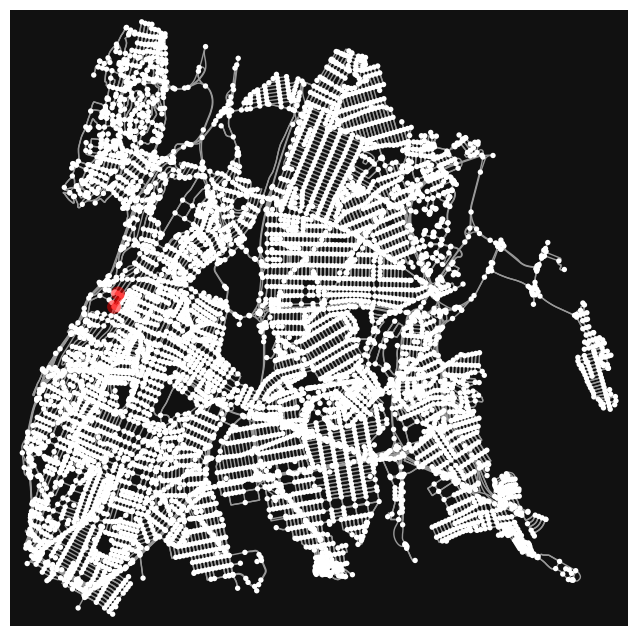

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [31]:
import osmnx as ox
import json
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import networkx as nx


G = ox.graph_from_place('Bronx', network_type='drive')
# G.nodes[42747810]
# nn = ox.distance.nearest_nodes(G, -73.9077684, 40.8596048)
# nn
# ox.plot_graph(G, bgcolor = "w", node_color = "r", edge_color = "#aaa", figsize = (12,12))

ox.plot_graph_route(G, [42747812, 42747810, 42769898], route_linewidth=4, route_alpha=0.5)

In [13]:
from pyrosm import OSM
import osmnx as ox
from json import dumps, loads
from sklearn.metrics.pairwise import haversine_distances
from math import radians


def calc_haversine_distance(start_y, start_x, dest_y, dest_x):
    starting_latlon = [start_y, start_x]
    dest_latlon = [dest_y, dest_x]
    start_in_radians = [radians(_) for _ in starting_latlon]
    dest_in_radians = [radians(_) for _ in dest_latlon]
    h_distance = (haversine_distances([start_in_radians, dest_in_radians]) * 6371)[0][1]
    return h_distance

osm = OSM("us-virgin-islands-latest.osm.pbf")
nodes, edges = osm.get_network(nodes=True)
# edges.head()
G = osm.to_graph(nodes, edges, graph_type="networkx")
node_dict = {}
for g in G.nodes():
    g_lat = G.nodes[g]['y']
    g_lon = G.nodes[g]['x']
    neighbors = list(G.neighbors(g))
    neighbor_dict = {}
    for n in neighbors:
        n_lat = G.nodes[n]['y']
        n_lon = G.nodes[n]['x']
        dist = calc_haversine_distance(g_lat, g_lon, n_lat, n_lon)
        neighbor_dict.update({n: dist})
        node_dict.update({g: (g_lat, g_lon, neighbor_dict)})

jsondata = {}

for k, v in node_dict.items():
    x = {
            k: {
                "lat": v[0],
                "lon": v[1],
                "neighbors": v[2]
            }
         }
    with open("nodes.json", "a") as f:
        f.write(dumps(x, indent = 4))
        f.write(',')   


# ox.plot_graph(G)